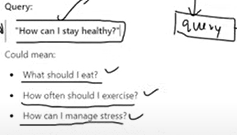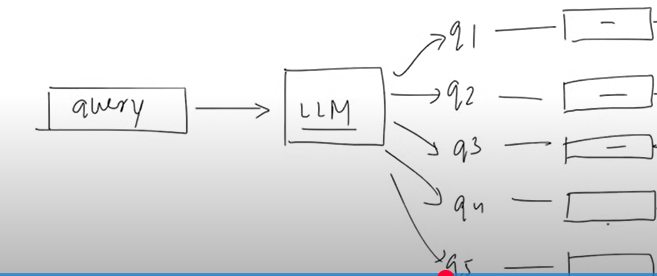

In [ ]:
!pip install langchain chromadb faiss-cpu sentence-transformers tiktoken pypdf langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.2 MB/s eta

In [ ]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-aOrFC5Kv6j6RomRGR-ACpT3BlbkFJ_oZ1CAo2shNwf4dwJK1rVFosrrfAyrH7TL3Gpf5DnKrkA"

Some Libraries

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_core.documents import Document

from langchain.retrievers.multi_query import MultiQueryRetriever

In [ ]:
# Relevant health & wellness documents
all_docs = [
    Document(page_content="Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
    Document(page_content="Deep sleep is crucial for cellular repair and emotional regulation.", metadata={"source": "H3"}),
    Document(page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.", metadata={"source": "H4"}),
    Document(page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.", metadata={"source": "H5"}),
    Document(page_content="The solar energy system in modern homes helps balance electricity demand.", metadata={"source": "I1"}),
    Document(page_content="Python balances readability with power, making it a popular system design language.", metadata={"source": "I2"}),
    Document(page_content="Photosynthesis enables plants to produce energy by converting sunlight.", metadata={"source": "I3"}),
    Document(page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.", metadata={"source": "I4"}),
    Document(page_content="Black holes bend spacetime and store immense gravitational energy.", metadata={"source": "I5"}),
]

In [ ]:
# Step 2: Initialize embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Step 3: Create the FAISS vector store from documents
vectorstore = FAISS.from_documents(
    documents = all_docs,
    embedding = embedding_model
)

<ipython-input-6-1340212675>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Convert FAISS vectorstore into a retriever

In [ ]:
# from langchain.retrievers.multi_query import MultiQueryRetriever
multiquery_retriever = MultiQueryRetriever.from_llm(
    retriever = vectorstore.as_retriever(search_kwargs={"k":5}), # you can add <-- earch_type = 'mmr',"lambda_mult": 0.5
    llm = ChatGoogleGenerativeAI(model='gemini-1.5-pro')

)

In [ ]:
# Query
query = "How to improve energy levels and maintain balance?"

In [ ]:
# Retrieve results
multiquery_result = multiquery_retriever.invoke(query)

In [ ]:
for i, doc in enumerate(multiquery_result):
  print(f"\n--- Resulty {i+1} ---")
  print(doc.page_content)